In [1]:
# Standard libraries
import datetime, time
import pandas as pd
import numpy as np
from datetime import datetime

# Visualisations libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg

# Text analysis libraries
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from string import punctuation 

# Image analysis libraries
import pytesseract
import cv2
import os
from PIL import Image
from pytesseract import Output

### 1. General Dataset Analysis

In [25]:
# Load in data
df = pd.read_csv('data/df_fin.csv').drop(columns = 'index')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,User,Tweet,Date,Hashtags,Image
0,Daily_Memes__,Shelves in the personal hygiene department in ...,2020-07-02,"[{'text': 'memes', 'indices': [55, 61]}, {'tex...",http://pbs.twimg.com/ext_tw_video_thumb/150388...
1,coincarpcom,Welcome back guys!\n\n#dogecoin #cryptocurrenc...,2017-08-03,"[{'text': 'dogecoin', 'indices': [20, 29]}, {'...",http://pbs.twimg.com/media/FN9cbVXVQAAaHPp.jpg
2,syansyan_yayaxo,RT @MONZUc2: Toplane be like\n#Memes #LeagueOf...,2020-02-25,"[{'text': 'Memes', 'indices': [29, 35]}, {'tex...",http://pbs.twimg.com/media/FN7jlBCXoAIvRdy.jpg
3,kevinac77652434,RT @MONZUc2: Toplane be like\n#Memes #LeagueOf...,2021-09-12,"[{'text': 'Memes', 'indices': [29, 35]}, {'tex...",http://pbs.twimg.com/media/FN7jlBCXoAIvRdy.jpg
4,funny_quote_bot,#Memes #meme #satire #motivation #motivational...,2022-02-23,"[{'text': 'Memes', 'indices': [0, 6]}, {'text'...",http://pbs.twimg.com/media/FN-RH5KWQAAxmEW.jpg
...,...,...,...,...,...
573,DankRedditBot,That headline is a work of art #dankmemes #mem...,2019-09-09,"[{'text': 'dankmemes', 'indices': [31, 41]}, {...",http://pbs.twimg.com/media/FOAO0l2VkAE2MW3.jpg
574,DankRedditBot,Wonder which dental school they went to #dankm...,2019-09-09,"[{'text': 'dankmemes', 'indices': [40, 50]}, {...",http://pbs.twimg.com/media/FOATZ2gVEAQGIkb.jpg
575,xxyoey,RT @DankMemesBot420: extra spicy #dankmemes ht...,2012-03-24,"[{'text': 'dankmemes', 'indices': [33, 43]}]",http://pbs.twimg.com/media/FOAG8DmXMAUZD-0.jpg
576,WriteWeed,RT @Slopez30: Tom Holland has been killing it ...,2018-06-19,"[{'text': 'funnymemes', 'indices': [46, 57]}, ...",http://pbs.twimg.com/media/FN-twHIUcAAOOIF.jpg


In [3]:
print(df.shape)

(578, 5)


In [4]:
df.describe()

,User,Tweet,Date,Hashtags,Image
count,578,578,578,578,578
unique,389,440,332,325,389
top,funny_quote_bot,RT @MONZUc2: Toplane be like\n#Memes #LeagueOf...,2022-02-23,"[{'text': 'Memes', 'indices': [0, 6]}, {'text'...",http://pbs.twimg.com/media/FN7jlBCXoAIvRdy.jpg
freq,56,29,57,56,29


In [5]:
miss_df = df.isnull().sum(axis = 0).reset_index()
miss_df.columns = ['variable', 'missing values']
miss_df['filling factor (%)'] = (df.shape[0] - miss_df['missing values']) / df.shape[0] * 100
miss_df.sort_values('filling factor (%)').reset_index(drop = True)
miss_df

,variable,missing values,filling factor (%)
0,User,0,100.0
1,Tweet,0,100.0
2,Date,0,100.0
3,Hashtags,0,100.0
4,Image,0,100.0


In [6]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [7]:
unidf = return_unique_values(df)
print(unidf)

   Features  Uniques
0      User      389
1     Tweet      440
2      Date      332
3  Hashtags      325
4     Image      389


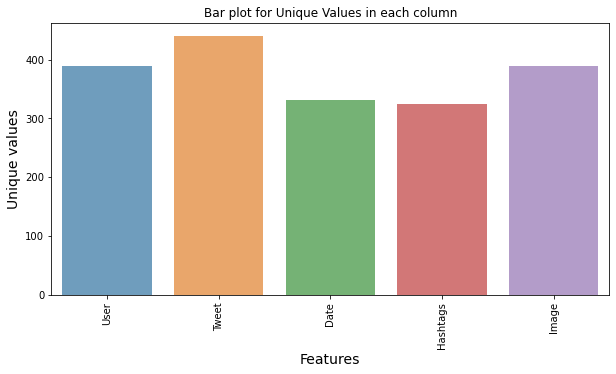

In [8]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [9]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of Unique {} tweeting'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


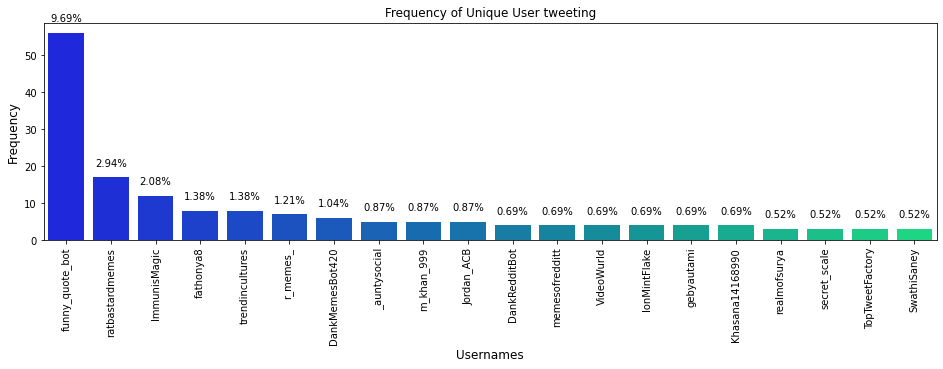

In [10]:
plot_frequency_charts(df, 'User', 'Usernames', 'winter')

### 2. Text Analysis

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def punctuation_stopwords_removal(sms):
    # Filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # Convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

In [13]:
def draw_bar_graph_for_text_visualization(df):
    tweets_from_loc = df.copy()
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['Tweet'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Most Prevelant Words")
    plt.xticks(rotation='vertical');

In [14]:
def draw_word_cloud(df, title):
    loc_df = df.copy()
    loc_df.loc[:, 'Tweet'] = loc_df['Tweet'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['Tweet']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

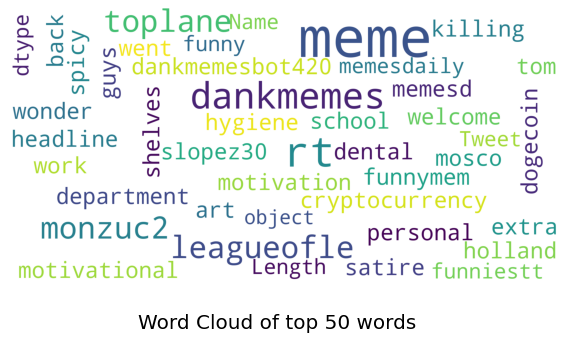

In [15]:
draw_word_cloud(df, 'Word Cloud of top 50 words')

C:\Users\richa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


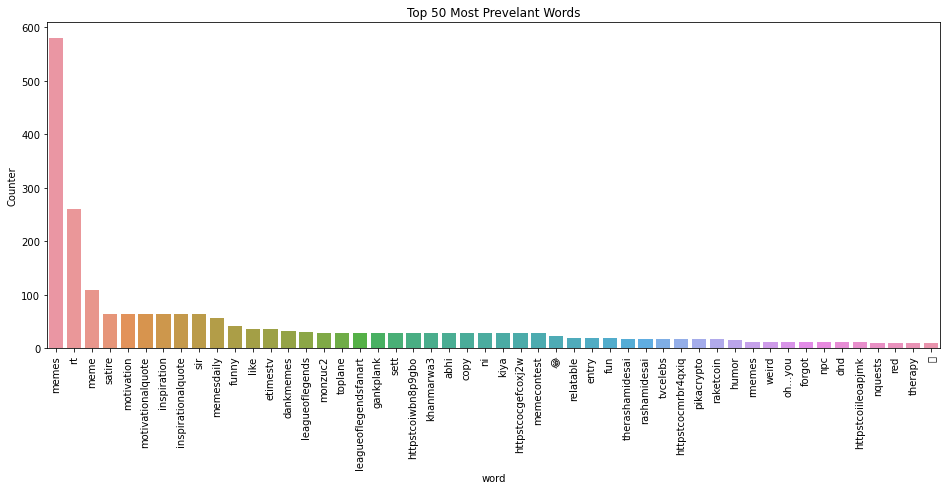

In [16]:
draw_bar_graph_for_text_visualization(df)

### 3. Image-with-text Analysis

In [17]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\richa\AppData\Local\Programs\Tesseract-OCR\Tesseract.exe"

In [18]:
img = cv2.imread('data\images\FOAO0l2VkAE2MW3.jpg')
text = pytesseract.image_to_string(img)
print(text)

& °
Bk oe

CTUT=ISCMV aroMel (om dal- Mo) arele)dial-micelsamaal(omauy(1o1m

Bz WSFA 12 News @ @wsfal2news - 1h

Scottsboro officer killed, wife critically injured after shooting
wsfa.com/2022/03/15/sco...

10:52 PM - 16 Mar 22 - Twitter for iPhone



In [19]:
f = []
t = []
input_dir = r'C:/Users/richa/OneDrive/Documenten/GitHub/master_thesis_2022/data/images/'

for root, dirs, filenames in os.walk(input_dir):
    for filename in filenames:
        try:
            print(filename)
            f.append(filename)
            img = Image.open(input_dir + filename)
            text = pytesseract.image_to_string(img)
            t.append(text)
            print(text)
            print('-='*20)
        except:
            continue


df = pd.DataFrame(list(zip(f, t)), columns = ['Image_name', 'Tweet'])

-HxZdjFxeaqyxFPA.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
0IqF7AShkQ-FFocg.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
1Mw0f9UsFP5Vp6Aw.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
1X68ddYfJtk0w3qn.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
40aaHdz74XgBRNCp.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
4B-sjhBWC4wKUupE.jpg
TikTok

2 @quizgames330


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
595S70UIW4biP_Ys.jpg
investors


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
8ZJEaL4ecCof1Gwe.jpg
fei |e (=o Kaco)an

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
aitHeKYD0W3-bYjF.jpg
@ hau.becks


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
BS1OXAFUm1I7EUWb.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
bxSCAd-NZnBnjJnX.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Cs8aTVkaAMxi6yOK.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
dcOjgP82ys3-Dm_p.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Dx-pvG3VsAE3s_d.jpg
youlsee, that's
e theytrouble began.
A n J

‘That smile.
“a ae

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

In [20]:
df

,Image_name,Tweet
0,-HxZdjFxeaqyxFPA.jpg,
1,0IqF7AShkQ-FFocg.jpg,
2,1Mw0f9UsFP5Vp6Aw.jpg,
3,1X68ddYfJtk0w3qn.jpg,
4,40aaHdz74XgBRNCp.jpg,
...,...,...
381,xQwHLG4WQ6QkWA3Q.jpg,Eu esperando minha\nYair fen eeell teLecekoy m...
382,Y1VUEuZRwGiomgWm.jpg,
383,yJJhmlvddXQoeA2x.jpg,
384,YWf5vu6PjfH_cuoo.jpg,


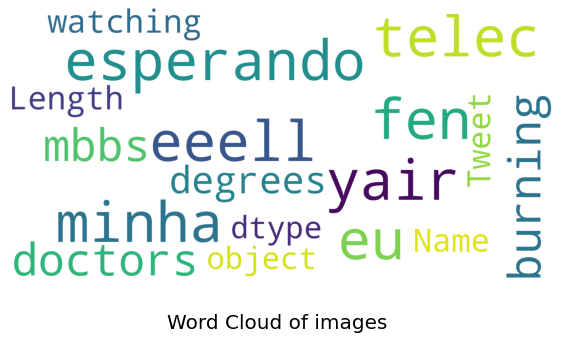

In [21]:
draw_word_cloud(df, 'Word Cloud of images')

In [23]:
def draw_bar_graph_for_text_visualization_2(df):
    tweets_from_loc = df.copy()
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['Tweet'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Most Prevelant Words & Symbols")
    plt.xticks(rotation='vertical');

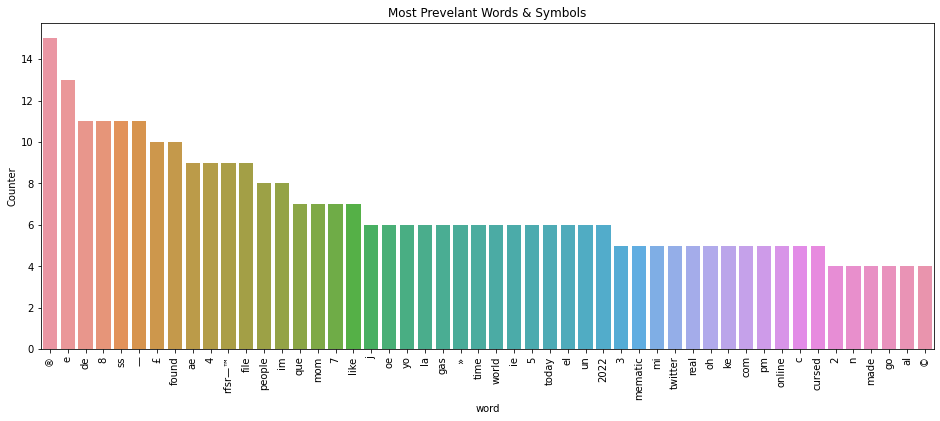

In [24]:
draw_bar_graph_for_text_visualization_2(df)